<a href="https://colab.research.google.com/github/Gvitagliano/SSN/blob/main/SSN_25_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.- Revisar els exemples del mètode numèric proposat per R. Feynmann per a resoldre les equacions
 del moviment i la seva implementació en python (script o Google Colab) així com el material
 discutit a classe durant aquesta setmana. Recordeu que els programes estan disponibles a:
 https://github.com/jfaraudo/Numerical-Newton-examples/


In [4]:
import numpy as np
import matplotlib.pyplot as plt

a) Escriure les equacions que descriuen l'evolució de la posició i de la velocitat en aquest mètode
 (en general, no per un exemple específic) i compareu-les amb les equacions corresponents al
 mètode de velocity Verlet.

**El método de Feynman ocupa estas ecuaciones:**

v(ϵ/2)=v$_0$+$\frac{a(0)ϵ}{2}$

x(t+ϵ)=x(t)+ϵv(t+ϵ/2),

v(t+ϵ/2)=v(t−ϵ/2)+ϵa(t),

a(t+ϵ)=f(t+ϵ)/m


**Mientras que el método Velocity Verlet ocupa las siguientes:**

x(t+ϵ) = x(t)+ϵv(t)+$\frac{1}{2}$*a(t)*ϵ$^2$

a(t+ϵ)=f(t+ϵ)/m

v(t+ϵ)=v(t)+$\frac{a(t)+a(t+ϵ)}{2}$ϵ

**Es interesante que en el método de Feynman para el cálculo de la velocidad usa la aceleración en el tiempo entre la velocidad de antes y la de después mientras que la de Verlet utiliza el promedio de las aceleraciones. Ambos son intentos de corregir la reversibilidad de la expresión del método de Euler.**

In [ ]:
dt = float(input("\n Time step dt (in ns):\n>"))
ntot = int(input("\n Number of time steps:\n>"))

# Feynman method

x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
t = np.zeros(ntot+1)

t[0] = 0.0
x[0] = x0
v[0] = v0

f = -k*x[0]
a[0] = f/m

v_hs = v[0]+(dt/2.0)*a

i=1

while i<ntot:
    # Calculate acceleration at present position x(t)
    a = -x[i]
	  #Velocity change from t-dt/2 to t+dt/2
    v_hs = v_hs+a*dt
    # New position at t+dt
    x[i+1] = x[i]+dt*v_hs
    #Update time
    t[i+1] = t[i]+dt
    #update counter
    i=i+1

# Velocity Verlet

t = np.zeros(ntot+1)
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
a = np.zeros(ntot+1)

x[0] = x0
v[0] = v0

f = -k*x[0]
a[0] = f/m

for i in range(1, ntot+1):
    print(i)

    # Update time
    t[i] = t[i-1]+dt

    # New position
    x[i] = x[i-1]+v[i-1]*dt+(1.0/2.0)*a[i-1]*dt*dt

    # Calculate Force at new position
    f = -k*x[i]
    # Calculate acceleration from 2nd Law
    a[i] = f/m

    # Velocity at new position
    am=(a[i-1]+a[i])/2.0
    v[i]= v[i-1]+am*dt

    #Update time
    t[i] = t[i-1]+dt

 b) En el programa d'exemple del mètode de Velocity Verlet (i en el del mètode d'Euler també) en
 cada pas de temps dt avaluem l'energia total (potencial i cinètica) per tal de verificar la conservació
 de l'energia. En canvi, això no està implementat en els exemples del mètode proposat per
 Feynmann. Perquè? Proposa una modificació que implementi aquest càlcul


 Initial position (in nm):
>1

 Initial velocity (in m/s):
>100

 Time step dt (in ns):
>0.1

 Number of time steps:
>50


Text(0, 0.5, 'E/E0')

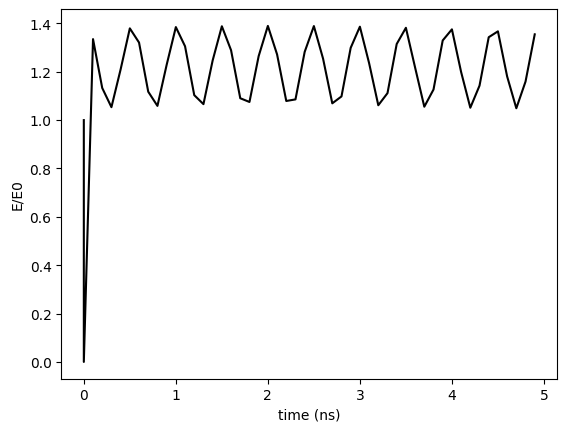

In [14]:
x0 = float(input("\n Initial position (in nm):\n>"))
v0 = float(input("\n Initial velocity (in m/s):\n>"))
dt = float(input("\n Time step dt (in ns):\n>"))
ntot = int(input("\n Number of time steps:\n>"))

# mass
m = 1.0
# Period in ns
T = 1.0
#frequency
w = 2.0*np.pi/T
#Force constant
k=m*w*w

E0=(m/2.0)*v0**2+(k/2)*x0**2 # Initial energy

x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
t = np.zeros(ntot+1)

t[0] = 0.0
x[0] = x0
v[0] = v0

a = -k*x[0]/m

v_hs = v[0]+(dt/2.0)*a

i=1

while i<ntot:
    # Calculate acceleration at present position x(t)
  a = -k*x[i]/m
	  #Velocity change from t-dt/2 to t+dt/2
  v_hs = v_hs+a*dt
    # New position at t+dt
  x[i+1] = x[i]+dt*v_hs
    #Update time
  t[i+1] = t[i]+dt
    #Update velocity
  v[i + 1] = v_hs + (dt / 2.0) * a
    #update counter
  i=i+1

E=(m/2.0)*v**2+(k/2)*x**2
#Relative value (E/E0)
RE=E/E0
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')

c) Compara la modificació proposada a (b) amb el mètode de Velocity Verlet.


 Initial position (in nm):
>1

 Initial velocity (in m/s):
>50

 Time step dt (in ns):
>0.1

 Number of time steps:
>50


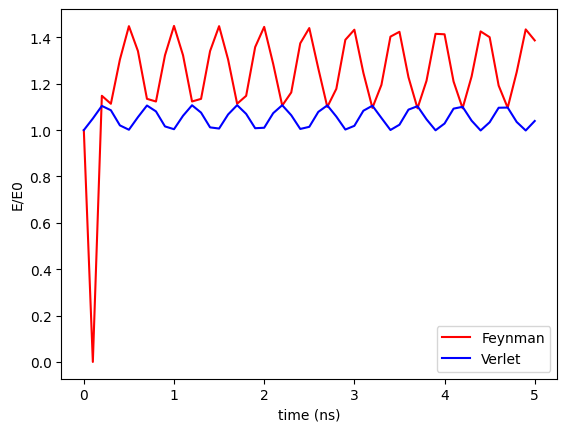

In [19]:
x0 = float(input("\n Initial position (in nm):\n>"))
v0 = float(input("\n Initial velocity (in m/s):\n>"))
dt = float(input("\n Time step dt (in ns):\n>"))
ntot = int(input("\n Number of time steps:\n>"))

# mass
m = 1.0
# Period in ns
T = 1.0
#frequency
w = 2.0*np.pi/T
#Force constant
k=m*w*w

E0=(m/2.0)*v0**2+(k/2)*x0**2 # Initial energy

# Feynman method

x_F = np.zeros(ntot+1)
v_F = np.zeros(ntot+1)
t = np.zeros(ntot+1)

t[0] = 0.0
x_F[0] = x0
v_F[0] = v0

a = -k*x[0]/m

v_hs = v[0]+(dt/2.0)*a

i=1

while i<ntot:
    # Calculate acceleration at present position x(t)
  a = -k*x[i]/m
	  #Velocity change from t-dt/2 to t+dt/2
  v_hs = v_hs+a*dt
    # New position at t+dt
  x_F[i+1] = x[i]+dt*v_hs
    #Update time
  t[i+1] = t[i]+dt
    #Update velocity
  v_F[i + 1] = v_hs + (dt / 2.0) * a
    #update counter
  i=i+1

E_F=(m/2.0)*v_F**2+(k/2)*x_F**2
#Relative value (E/E0)
RE_F=E_F/E0

# Verlet method

t = np.zeros(ntot+1)
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
a = np.zeros(ntot+1)

#Initial conditions
x[0] = x0
v[0] = v0

#Force and acceleration at t=0
f = -k*x[0]
a[0] = f/m

# Time evolution

for i in range(1, ntot+1):
    # Update time
  t[i] = t[i-1]+dt
    # New position
  x[i] = x[i-1]+v[i-1]*dt+(1.0/2.0)*a[i-1]*dt*dt
    # Calculate Force at new position
  f = -k*x[i]
    # Calculate acceleration from 2nd Law
  a[i] = f/m
    # Velocity at new position
  am=(a[i-1]+a[i])/2.0
  v[i]= v[i-1]+am*dt
    #Update time
  t[i] = t[i-1]+dt

#energy at all steps
E=(m/2.0)*v*v+(k/2)*x*x
RE=E/E0

plt.plot(t,RE_F,'r',label='Feynman')
plt.plot(t,RE,'b',label='Verlet')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
plt.legend()
plt.show()

Se puede observar como ambos métodos conservan la energía en un intervalo. Es importante notar que el método de Verlet fluctúa mucho menos y no tiene el pico en energía que tiene el método de Feynman al principio.

 2.- Escriviu l'equació d'Schrödinger en unitats SI i en unitats atòmiques per un exemple que hagiu
 estudiat en les assignatures prèvies (per exemple, a Fenòmens Quantics I, II o a qualsevol altre).
 Podeu revisar la definició d'unitats atòmiques en qualsevol dels links sobre aquestes unitats que
 teniu al Campus Virtual (per exemple el link a Libre Text) o bé dels vostres apunts d'altres
 assignatures.

La ecuación de Schrödinger para un electron en un pozo de potencial cuadrado infinito de longitud L y con el 0 en uno de los extremos del pozo se cumple de la siguiente manera:

En SI:

-$\frac{\hbar^2}{2m_e}$$\sqrt{\frac{2}{L}}$$\frac{∂^2}{∂x^2}$sin($\frac{nπx}{L}$)=$\frac{π^2\hbar^2n^2}{2m_eL^2}$sin($\frac{nπx}{L}$)

Y, en unidades atómicas:

-$\frac{1}{2}$$\sqrt{\frac{2}{L}}$$\frac{∂^2}{∂x^2}$sin($\frac{nπx}{L}$)=$\frac{π^2n^2}{2L^2}$sin($\frac{nπx}{L}$)